# RESIDUAL ANALYSIS

Y ACTUAL -Y PREDICTED


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:

california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target

In [8]:
X=df.drop('Price',axis=1)

In [9]:
y=df['Price']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
model=LinearRegression()

In [12]:
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(X_test)

In [14]:
c = model.intercept_
m = model.coef_[0]
 
print(m)

print(c)

print(f"Equation of the line : y={m:.2f}x+{c:.2f}")

0.4486749096657174
-37.02327770606402
Equation of the line : y=0.45x+-37.02


# step 2 : calculate Residuals

In [20]:
residuals=y_test-y_pred
print(pd.DataFrame({'Actual ': y_test[:5],'Predicted ':y_pred[:5],'Residuals':residuals[:5]}))

       Actual   Predicted   Residuals
20046  0.47700    0.719123  -0.242123
3024   0.45800    1.764017  -1.306017
15663  5.00001    2.709659   2.290351
20484  2.18600    2.838926  -0.652926
9814   2.78000    2.604657   0.175343


Text(0, 0.5, 'Residual')

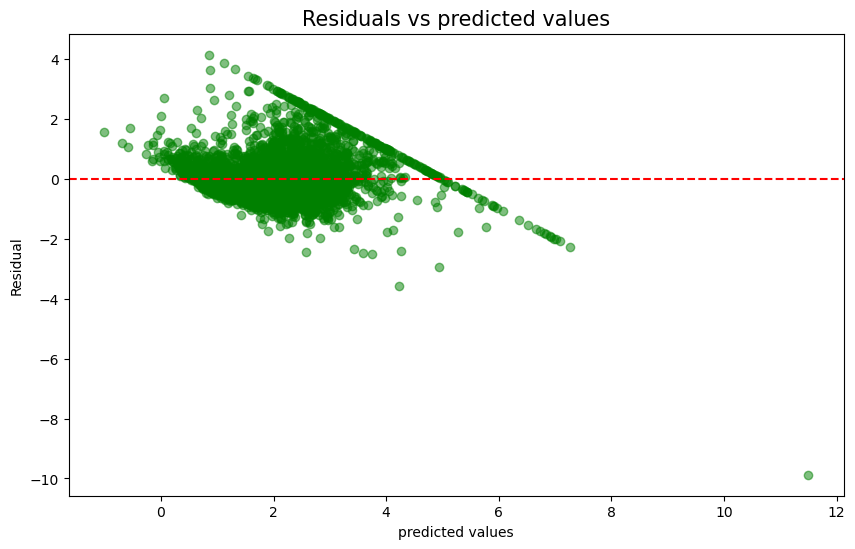

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='green',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Residuals vs predicted values',fontsize=15)
plt.xlabel('predicted values')
plt.ylabel('Residual')

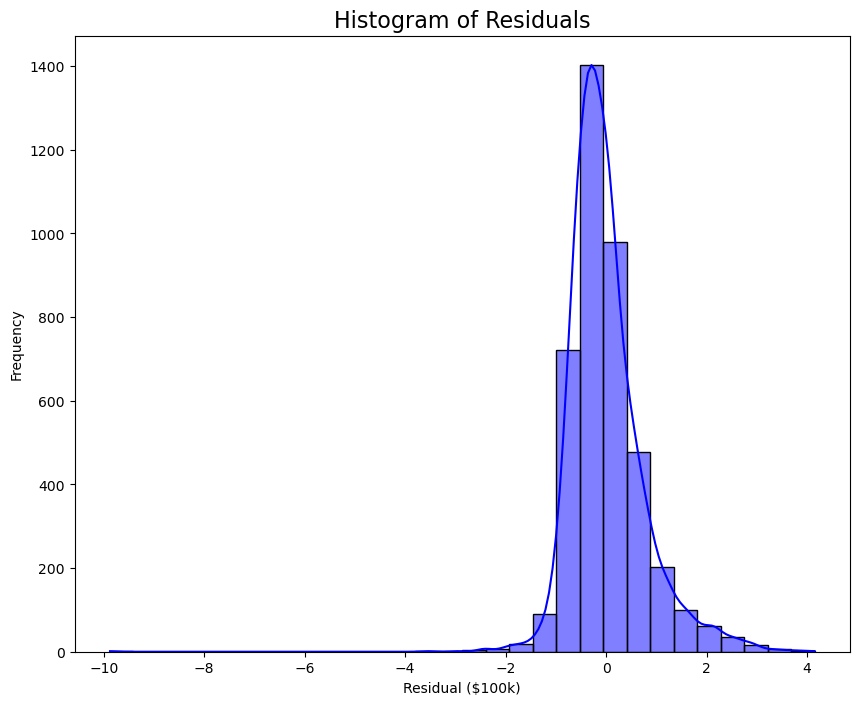

In [25]:
plt.figure(figsize=(10,8))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title('Histogram of Residuals',fontsize=16)
plt.xlabel('Residual ($100k)')
plt.ylabel('Frequency')
plt.show()


What to look for 

    good : bell shaped curve
    bad : 

# Q-Q plot of residuals

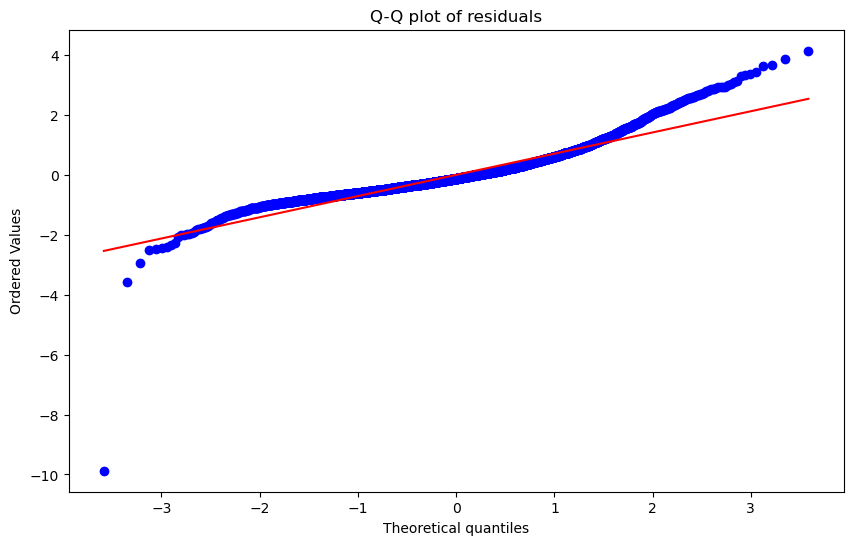

In [28]:
import scipy.stats as st
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
st.probplot(residuals, dist='norm', plot=plt)
plt.title("Q-Q plot of residuals")
plt.show()


what to look for : 
  
  good : points follow the red line 
  
 
  bad : big deviations escpecially at the end 
  
  
  our case : mostly linear, but tails curve off-non-normal extremes(capping effect)


# Step 4: Interpret Residual Analysis
**Linearity**: Scatter plot shows no strong curve—assumption holds decently.

 **Constant Variance**: Slight fanning at higher prices—mild heteroscedasticity (variance grows).

 Normality: Histogram and Q-Q show approximate normality, but tails suggest outliers or

 capping ($500K limit skews residuals).

Model's okay but not perfect—capping and non-constant variance could be issues.